## Predicting Customer Churn

### Introduction

Customer churn is when an existing customer stops doing business or ends the relationships with a company. In this project, I will focus on predicting will a cellular usage customer churn and cancel the cellular plan.

### Project Goal

Predict will a customer churn and cancel the cellular plan.

### Dataset

The data that is used in this project comes from Kaggle (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).
This cellular usage dataset consists of records of actual cell phone customers and features to a customer's cell services such as voice mail, international calling, cost for the service, usage information, and whether customers cancelled their services or not.

### Exploratory Data Analysis

### Data Exploration

In [63]:
import pandas as pd
telco = pd.read_csv('churn.csv')

In [44]:
# Check the shape of the data
telco.shape

(3333, 21)

In [6]:
# Check structure and features
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [3]:
# Run summary statistics
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [8]:
# Get a list of the column names
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [9]:
# Return first n rows of data
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [19]:
# Compute the mean for churners and non-churners
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


On average, customers who are churners, made more customer service calls than non-churners. 

In [18]:
# Compute the standard deviation for churners and non-churners
telco.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


In [72]:
# Count the number of churners and non-churners by State
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

In [545]:
# Count non-NA cells for each column
telco.isnull().sum()

Account_Length      0
Vmail_Message       0
Day_Mins            0
Eve_Mins            0
Night_Mins          0
                   ..
Intl_Cost          18
Avg_Day_Calls       2
Avg_Eve_Calls       1
Avg_Night_Calls     0
Avg_Intl_Calls     18
Length: 80, dtype: int64

#### Output Label

In [64]:
# Count number of churners and non-churners
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

There are nearly 6 times as many non-churners as there are churners.

In [65]:
telco['OUTPUT_LABEL'] = (telco['Churn'] == 'yes').astype(int)

In [67]:
telco['OUTPUT_LABEL'].value_counts()

0    2850
1     483
Name: OUTPUT_LABEL, dtype: int64

In [68]:
telco[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
0,0
1,0
2,0
3,0
4,0


In [69]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [70]:
print('prevalence of the positive class: %.3f'%calc_prevalence(telco['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.145


It means that 1 in 7 customers will churn or cancel the plan.

### Data Visualizations

### Distribution of Account Length

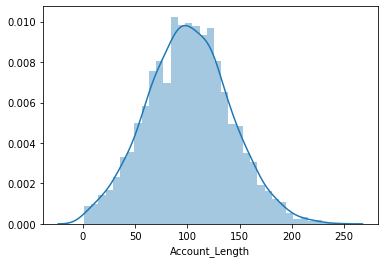

In [75]:
# Distribution of Account Length
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(telco['Account_Length'])
plt.show();

The graph shows that the data is  normally distributed.

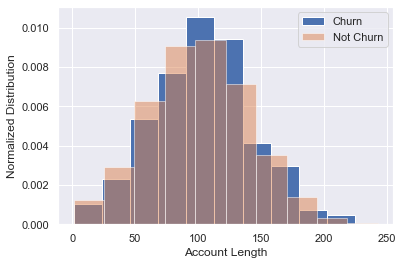

In [771]:
plt.hist(telco.loc[telco.OUTPUT_LABEL==1,'Account_Length'],label="Churn", density=True)
plt.hist(telco.loc[telco.OUTPUT_LABEL==0,'Account_Length'],label="Not Churn", density=True, alpha=0.5)
plt.xlabel('Account Length')
plt.ylabel('Normalized Distribution')
plt.legend()
plt.show()

#### Distribution of Minutes

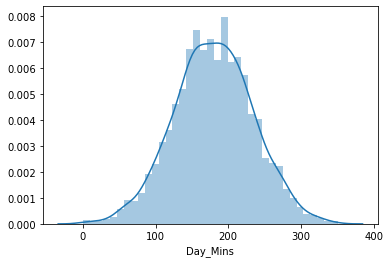

In [32]:
# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])
plt.show()

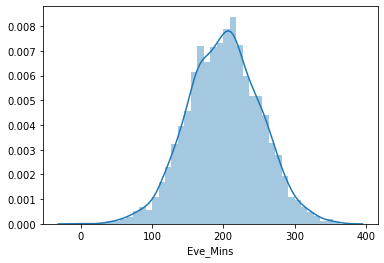

In [33]:
# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])
plt.show()

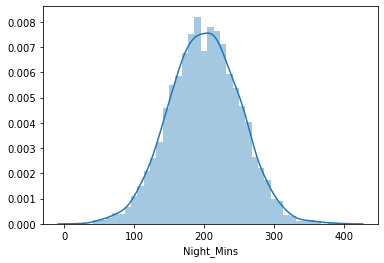

In [37]:
# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])
plt.show()

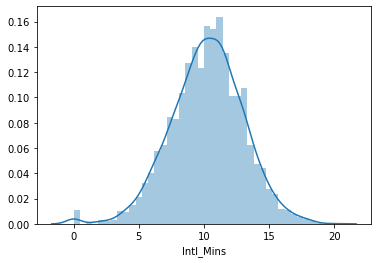

In [38]:
# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])
plt.show()

Based on the graphs, we can observe that Day_Mins, Eve_Mins, Night_Mins and Intl_Mins features have normal distribution.

### Difference in Account Length

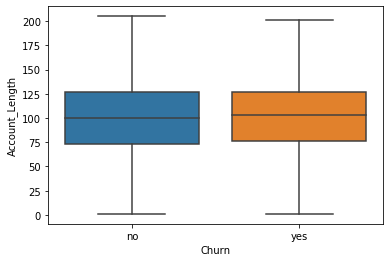

In [29]:
# Difference in Account Length
sns.boxplot(x='Churn', y='Account_Length', data = telco, sym="")
plt.show;

According to the graph, the line in the middle of each box indicates that median is about 100 for the account lengths of both churners and non-churners. The two colored boxes are the middle 50 percent of the account lengths for each group. The values range from the 25th to 75th percentile, which is about 75 to 125.

### Impact of International Plan

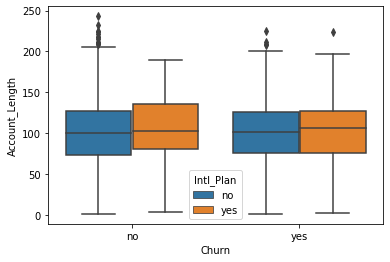

In [36]:
# Analyze impact of international plan
sns.boxplot(x='Churn', y='Account_Length', data = telco, hue='Intl_Plan')
plt.show;

#### Difference in Charges

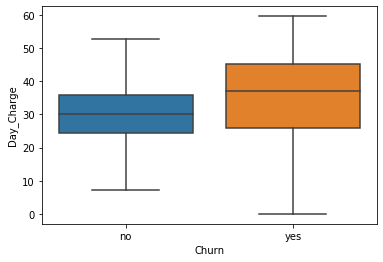

In [79]:
# Difference in day charge
sns.boxplot(x='Churn', y='Day_Charge', data = telco, sym="")
plt.show;

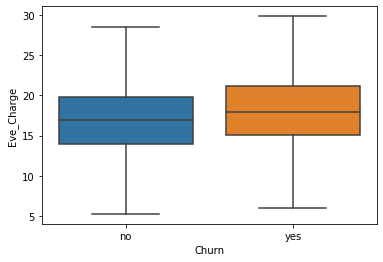

In [78]:
# Difference in evening charge
sns.boxplot(x='Churn', y='Eve_Charge', data = telco, sym="")
plt.show;

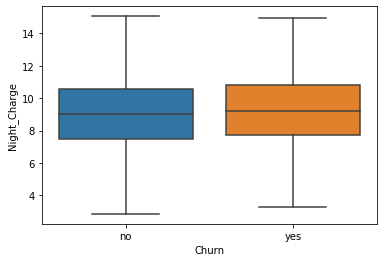

In [80]:
# Difference in  night charge
sns.boxplot(x='Churn', y='Night_Charge', data = telco, sym="")
plt.show;

After compared the three charges, we can observe that there are more churners when the day charge is above 35.

### Customer Calls and Churn

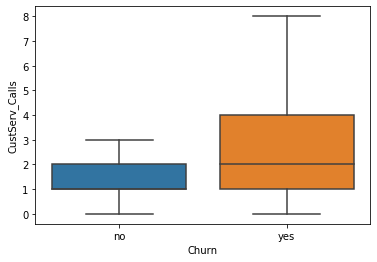

In [40]:
# Create the box plot
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym="")
plt.show()

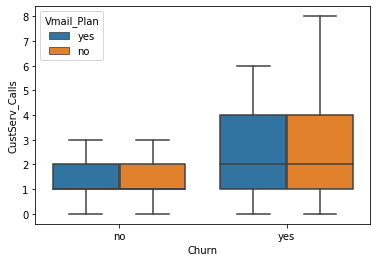

In [41]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Vmail_Plan")
plt.show()

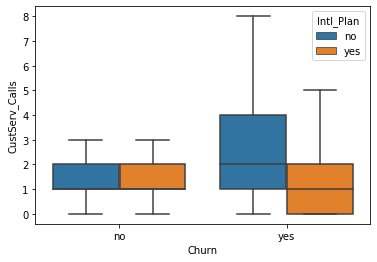

In [42]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Intl_Plan")
plt.show()

Customers who are churners make more customer service calls, unless these customers also subscribe to an international plan.

## Data Preprocessing

### Encoding Binary Features

#### Convert International Plan

In [85]:
from sklearn.preprocessing import LabelEncoder

telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

#### Convert Voicemail Plan and Churn

In [86]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0, 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0, 'yes': 1})

In [87]:
# Check the results to verify
telco['Vmail_Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

In [88]:
# Check the results to verify
telco['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

### Feature selection and engineering

In [98]:
# Explore correlation between the features
telco.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.018459,-0.011086,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646


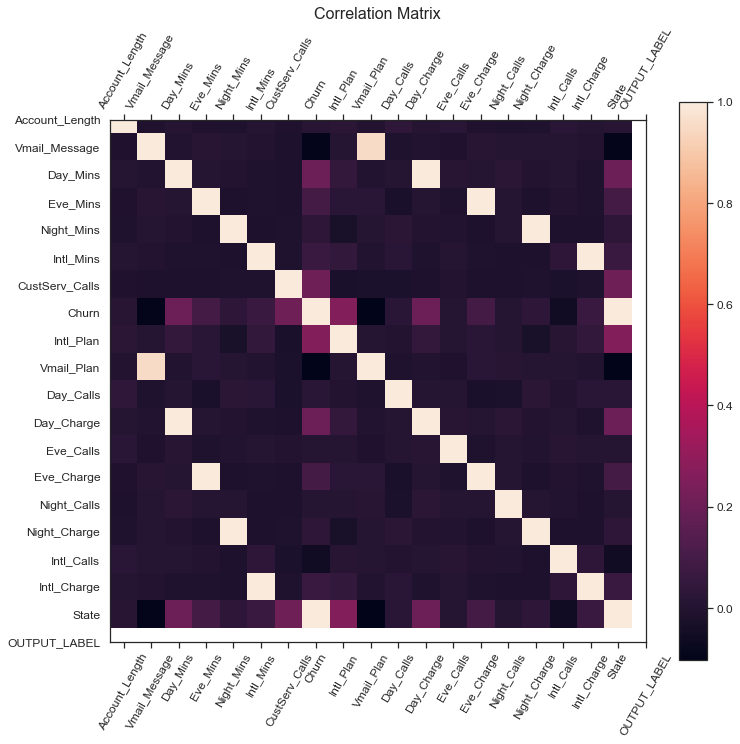

In [378]:
f = plt.figure(figsize=(12, 10))
plt.matshow(telco.corr(), fignum=f.number)
plt.xticks(range(telco.shape[1]), telco.columns, fontsize=12, rotation=60)
plt.yticks(range(telco.shape[1]), telco.columns, fontsize=12)

plt.tick_params(bottom=True, top=True, labelbottom=True, labeltop=True)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16, y=1);

Day Minutes, Evening Minutes, Night Minutes, and International Minutes are highly correlated with Day Charge, Night Charge, and International Charge, respectively. We can improve the performance of our model by excluding Day Minutes, Evening Minutes, Night Minutes, and International Minutes.

#### Numerical Features

In [530]:
# create a new feature that contains information about the total charges
telco['Total_Charge'] = telco['Day_Charge'] + telco['Eve_Charge'] + telco['Night_Charge'] + telco['Intl_Charge']

In [531]:
# create a new feature that contains information about the total calls
telco['Total_Calls'] = telco['Day_Calls'] + telco['Eve_Calls'] + telco['Night_Calls'] + telco['Intl_Calls']

In [533]:
# create a new feature that contains information about the Ratio between day minutes and day charge
telco['Day_Cost'] = telco['Day_Mins'] / telco['Day_Charge']

In [534]:
# create a new feature that contains information about the Ratio between evening minutes and evening charge
telco['Eve_Cost'] = telco['Eve_Mins'] / telco['Eve_Charge']

In [535]:
# create a new feature that contains information about the Ratio between night minutes and night charge
telco['Night_Cost'] = telco['Night_Mins'] / telco['Night_Charge']

In [536]:
# create a new feature that contains information about the Ratio between intl minutes and intl charge
telco['Intl_Cost'] = telco['Intl_Mins'] / telco['Intl_Charge']

In [537]:
# create a new feature that contains information about the average length of day calls made by customers
telco['Avg_Day_Calls'] = telco['Day_Mins'] / telco['Day_Calls']

In [538]:
# create a new feature that contains information about the average length of evening calls made by customers
telco['Avg_Eve_Calls'] = telco['Eve_Mins'] / telco['Eve_Calls']

In [539]:
# create a new feature that contains information about the average length of night calls made by customers
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

In [540]:
# create a new feature that contains information about the average length of intl calls made by customers
telco['Avg_Intl_Calls'] = telco['Intl_Mins'] / telco['Intl_Calls']

In [603]:
# Create a subset of telco DataFrame to only include the features we want to train
cols_num = ['Account_Length', 'Vmail_Message', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 
            'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 
            'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Total_Charge', 'Total_Calls',
            'Day_Cost','Eve_Cost', 'Night_Cost','Intl_Cost', 'Avg_Day_Calls',
            'Avg_Eve_Calls', 'Avg_Night_Calls', 'Avg_Intl_Calls']

#### Engineering Features Summary

In [543]:
print('Total number of features:', len(cols_num))

Total number of features: 23


#### Check for missing data

In [604]:
#df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(5)
telco[cols_num].isnull().sum().sort_values(ascending = False)

Avg_Intl_Calls     18
Intl_Cost          18
Avg_Day_Calls       2
Day_Cost            2
Avg_Eve_Calls       1
Eve_Cost            1
Eve_Charge          0
Vmail_Message       0
CustServ_Calls      0
Intl_Plan           0
Vmail_Plan          0
Day_Calls           0
Day_Charge          0
Eve_Calls           0
Intl_Calls          0
Night_Calls         0
Night_Charge        0
Avg_Night_Calls     0
Intl_Charge         0
Total_Charge        0
Total_Calls         0
Night_Cost          0
Account_Length      0
dtype: int64

In [605]:
cols_input = cols_num
df_data = telco[cols_input + ['OUTPUT_LABEL']]

In [606]:
# Check the shape of df_data
df_data.shape

(3333, 24)

In [607]:
# Check index is unique
df_data.index.is_unique

True

In [608]:
# Check for duplicated columns
cc = list(df_data.columns)
set([x for x in cc if cc.count(x) > 1])

set()

### Building Training/Validation/Test Samples

In [609]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [610]:
# save 30% of the data as validation and test data
df_valid_test = df_data.sample(frac = 0.30, random_state = 42) 
print('Split size: %.3f'%(len(df_valid_test) / len(df_data)))

Split size: 0.300


In [611]:
# split into test data and exclude them from validation and test data
df_test = df_valid_test.sample(frac = 0.50, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [612]:
# use the rest of the data as training data
df_train_all = df_data.drop(df_valid_test.index)

In [613]:
df_train_all.shape

(2333, 24)

In [614]:
# check the prevalence of each group
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 500):0.146
Valid prevalence(n = 500):0.108
Train all prevalence(n = 2333):0.153


In [615]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 3333)


In [616]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 712):0.500


In [617]:
# Save all 4 dataframes to csv and the cols_input
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [618]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [619]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [620]:
df_mean = df_train_all[cols_input].mean(axis = 0)

# save the means
df_mean.to_csv('df_mean.csv',index = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [621]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,Account_Length,101.645092
1,Vmail_Message,8.137162
2,CustServ_Calls,1.567938
3,Intl_Plan,0.103729
4,Vmail_Plan,0.277754


In [622]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [623]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (2333, 23)
Training shapes: (712, 23) (712,)
Validation shapes: (500, 23) (500,)


In [624]:
# use scikit learn's Standard Scaler to remove the mean and scales to unit variance 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [625]:
# We will need this scaler for the test data, so we save it using a package called pickle.
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [626]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [627]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

## Model Selection

In [23]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [42]:
thresh = 0.5

### K nearest neighbors (KNN)

In [628]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [629]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


KNN
Training:
AUC:0.879
accuracy:0.735
recall:0.517
precision:0.915
specificity:0.952
prevalence:0.500
 
Validation:
AUC:0.874
accuracy:0.932
recall:0.537
precision:0.763
specificity:0.971
prevalence:0.108
 


KNN model did well. We have an AUC of 0.89 that catches 61 percent of the churn rate when we use a threshold of 0.5.

### Logistic Regression model

In [633]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [634]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.828
accuracy:0.764
recall:0.756
precision:0.769
specificity:0.772
prevalence:0.500
 
Validation:
AUC:0.801
accuracy:0.778
recall:0.722
precision:0.289
specificity:0.785
prevalence:0.108
 


### Stochastic Gradient Descent

In [635]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log', alpha = 0.1, random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [636]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.823
accuracy:0.756
recall:0.753
precision:0.757
specificity:0.758
prevalence:0.500
 
Validation:
AUC:0.798
accuracy:0.780
recall:0.722
precision:0.291
specificity:0.787
prevalence:0.108
 


### Naive Bayes

In [637]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [638]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.850
accuracy:0.801
recall:0.801
precision:0.801
specificity:0.801
prevalence:0.500
 
Validation:
AUC:0.827
accuracy:0.796
recall:0.796
precision:0.321
specificity:0.796
prevalence:0.108
 


### Decision Tree Classifier

In [639]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [640]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.995
accuracy:0.979
recall:0.969
precision:0.989
specificity:0.989
prevalence:0.500
 
Validation:
AUC:0.912
accuracy:0.900
recall:0.889
precision:0.522
specificity:0.901
prevalence:0.108
 


### Random Forest

In [641]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [642]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


Random Forest
Training:
AUC:0.982
accuracy:0.940
recall:0.888
precision:0.991
specificity:0.992
prevalence:0.500
 
Validation:
AUC:0.920
accuracy:0.926
recall:0.889
precision:0.608
specificity:0.930
prevalence:0.108
 


For Random Forest model, we have an AUC of 0.88 that catches 81 percent of the churn rate when we use a threshold of 0.5.

### Gradient Boosting Classifier

In [643]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [644]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.924
accuracy:0.934
recall:0.870
precision:0.644
specificity:0.942
prevalence:0.108
 


For Gradient Boosting model, we have an AUC of 0.9 that catches 87 percent of the churn rate when we use a threshold of 0.5.

### XGBoost Classifier

In [675]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth = 10, random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=1.0, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [676]:
y_train_preds = xgb.predict_proba(X_train)[:,1]
y_valid_preds = xgb.predict_proba(X_valid_tf)[:,1]

print('XGBoost Classifier')
print('Training:')
xgb_train_auc, xgb_train_accuracy, xgb_train_recall, \
    xgb_train_precision, xgb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgb_valid_auc, xgb_valid_accuracy, xgb_valid_recall, \
    xgb_valid_precision, xgb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

XGBoost Classifier
Training:
AUC:1.000
accuracy:1.000
recall:1.000
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.666
accuracy:0.890
recall:0.019
precision:0.333
specificity:0.996
prevalence:0.108
 


### Analyze results baseline models

In [647]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB','XGB', 'XGB'],
                           'data_set':['train','valid']*8,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,xgb_train_auc,xgb_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgb_train_accuracy,xgb_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,xgb_train_recall,xgb_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,xgb_train_precision,xgb_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,xgb_train_specificity,xgb_valid_specificity,]})


In [648]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

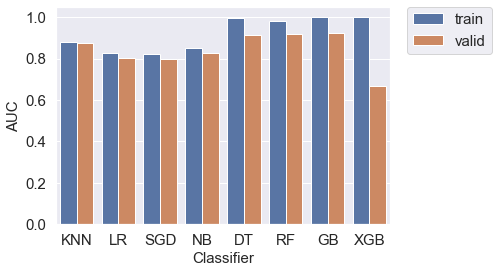

In [649]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

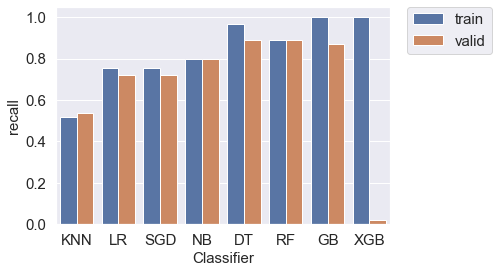

In [650]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

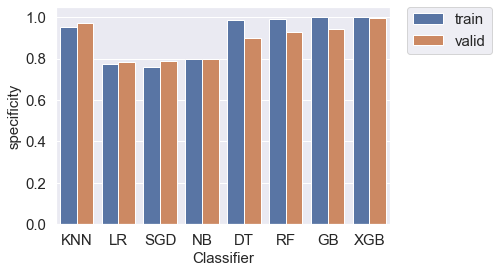

In [651]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

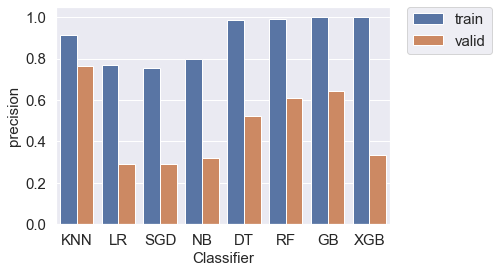

In [652]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

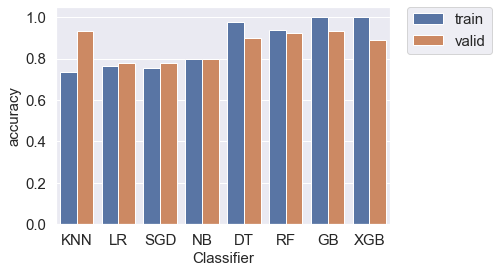

In [653]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

#### Summary of Baseline Models' Performance
Gradient Boosting (GB) is the model with the highest Area under the ROC curve (AUC) of 0.92 in validation data set among all models. Besides AUC, we want our model to have high precision or minimize false positive as the percentage of churners is about 14.5 percent and we assume that the offer to keep potential churners is high. Thus, we also choose Random Forest and K-Nearest Neighbors to be the three best baseline models.

In [ ]:
df_results_knn = pd.DataFrame({'classifier1':['KNN','KNN'],
                                'data_set':['train','valid']*1,
                                'auc1':[knn_train_auc,knn_valid_auc,],
                                'accuracy1':[knn_train_accuracy,knn_valid_accuracy,],
                                'recall1':[knn_train_recall,knn_valid_recall,],
                                'precision1':[knn_train_precision,knn_valid_precision,],
                                'specificity1':[knn_train_specificity,knn_valid_specificity,],})

df_results_knn

In [654]:
df_results_knn = pd.DataFrame({'classifier1':['KNN','KNN'],
                                'data_set':['train','valid']*1,
                                'auc1':[knn_train_auc,knn_valid_auc,],
                                'accuracy1':[knn_train_accuracy,knn_valid_accuracy,],
                                'recall1':[knn_train_recall,knn_valid_recall,],
                                'precision1':[knn_train_precision,knn_valid_precision,],
                                'specificity1':[knn_train_specificity,knn_valid_specificity,],})

df_results_knn

,classifier1,data_set,auc1,accuracy1,recall1,precision1,specificity1
0,KNN,train,0.878740,0.734551,0.516854,0.915423,0.952247
1,KNN,valid,0.874273,0.932000,0.537037,0.763158,0.970852


### Learning Curve

In [164]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

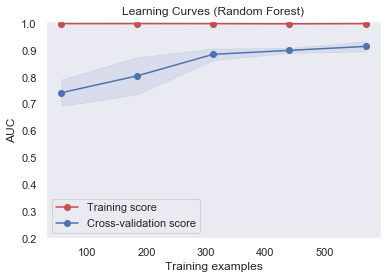

In [678]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

From the learning curves, we can tell that this random forest model has high variance (overfitting) as the learning curves converge to a low score. One possible cause of overfitting could be due to the model is too complex. To reduce variance (noise), we could increase sample data, increase regularization, decrease number of input features, introduce better features or simplify the model.

## Hyperparameter Tuning

### Tuning the model

Choose the optimal hyperparameters that lead to the best performing model

### Feature Importance

### Logistic Regression feature importance

In [741]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [742]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                   columns=['importance']).sort_values('importance', ascending = False)

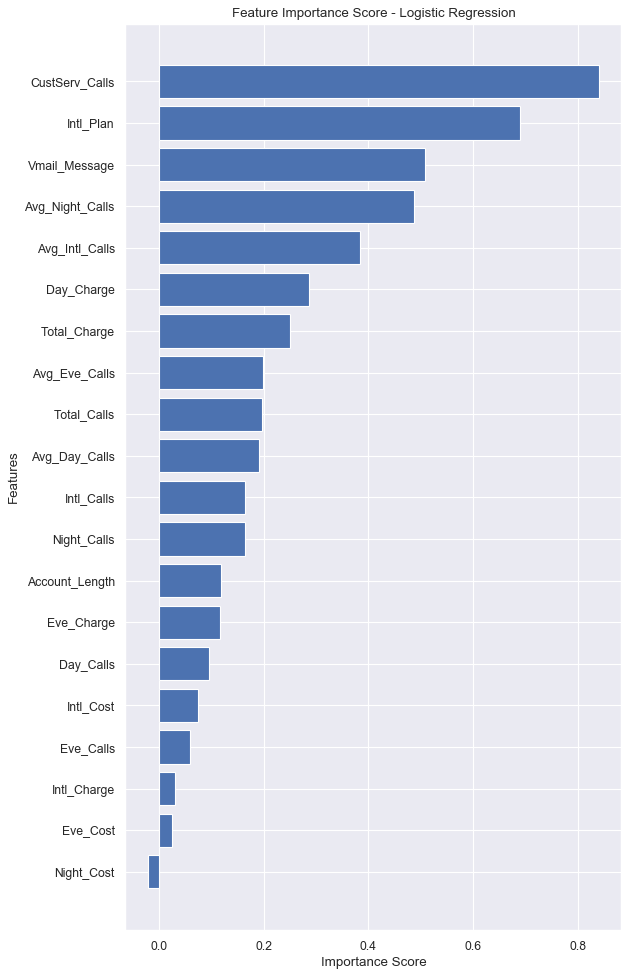

In [743]:
# Positive feature importance for logistic regression
num = np.min([20, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

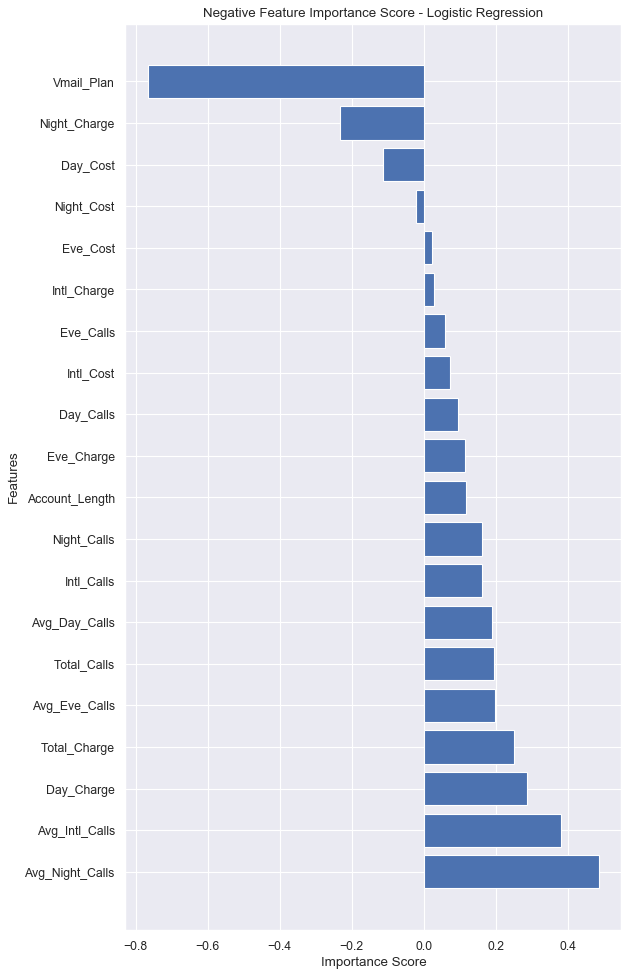

In [744]:
# Negative feature importance for logistic regression
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

For the logistic regression, the variables with highest positive coefficients are predictive of customer service calls and the variables with highest negative coefficients are predictive of voicemail plan.

### Gradient Boosting feature importance

In [751]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [752]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance', ascending = False)
feature_importances.head()

,importance
Total_Charge,0.347957
Intl_Plan,0.214708
CustServ_Calls,0.201877
Vmail_Message,0.036397
Avg_Intl_Calls,0.025260


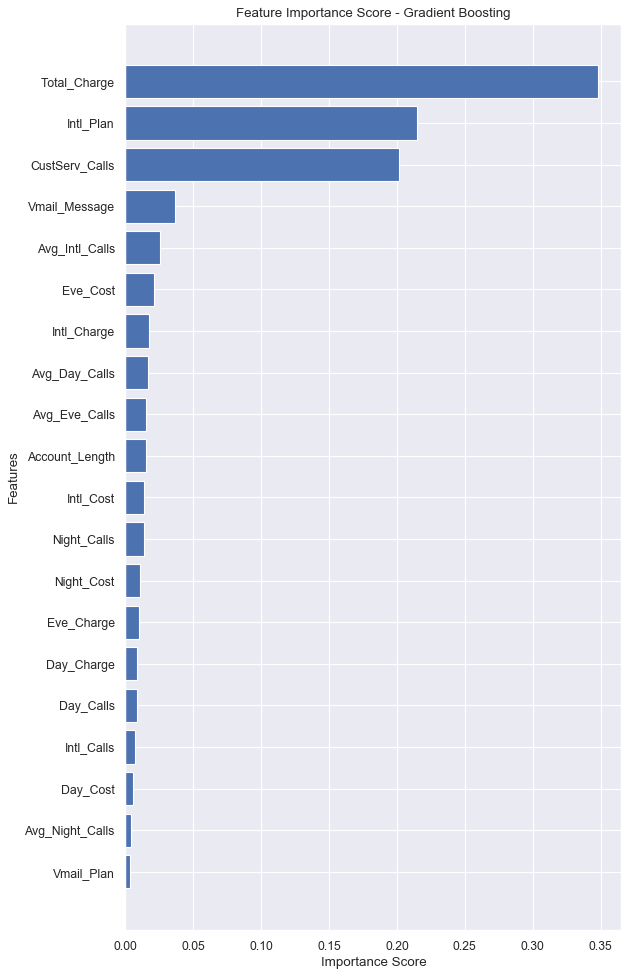

In [754]:
# Positive feature importance for gradient boosting
num = np.min([20, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting')
plt.yticks(ylocs, feature_labels)
plt.show()

For the gradient boosting, total charges and international plan are the most important features.

#### Random Forest feature importance

In [745]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [747]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance', ascending = False)
feature_importances.head()

,importance
Total_Charge,0.214515
CustServ_Calls,0.143915
Day_Charge,0.096217
Intl_Plan,0.072403
Avg_Day_Calls,0.056086


In [ ]:
# feature importance for random forest
num = np.min([20, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

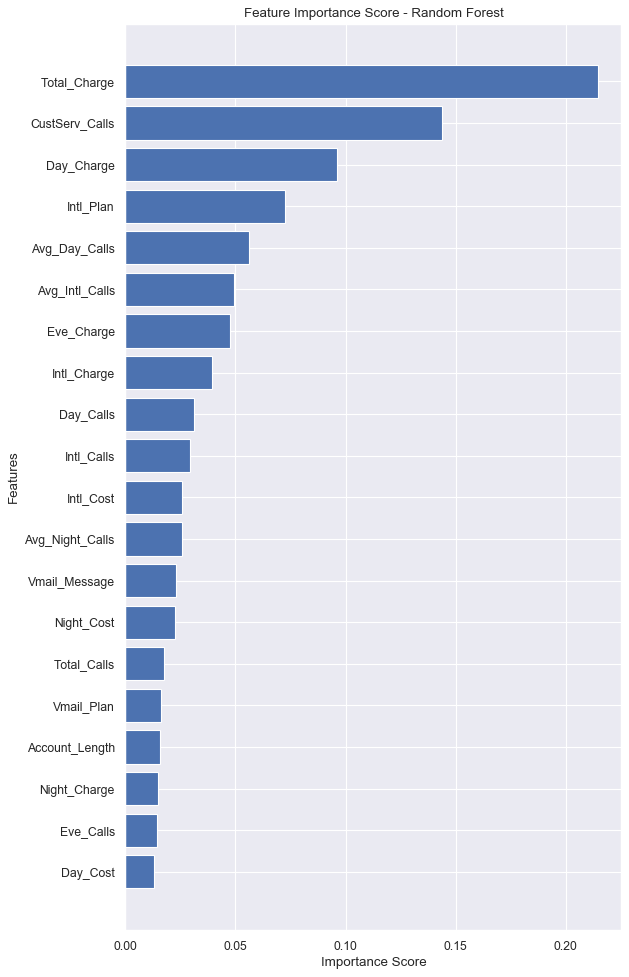

In [748]:
# Positive feature importance for random forest
num = np.min([20, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

For the random forest, total charges and customer service calls are the most important features.

### Randomized search

In [442]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [679]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [680]:
# Use auc to evaluate a set of hyperparameters in RandomizedSearchCV function.
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

#### Optimize Random Forest Classifier

In [681]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [682]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   21.2s finished


21.396947860717773


In [683]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'entropy'}

In [684]:
# analyze the performance of the Optimized Random Forest model compared to its baseline model
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))


Baseline Random Forest
Training AUC:0.982
Validation AUC:0.920
Optimized Random Forest
Training AUC:0.983
Validation AUC:0.921


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In this case, we get a boost of 0.001 on the random forest's Validation AUC.

#### Optimize Gradient Boosting Classifier

In [759]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [760]:
# number of boosting steps
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid
random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, 
                                n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

3.0404727458953857


In [761]:
gbc_random.best_params_

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

In [762]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Gradient Boosting')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized Gradient Boosting')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline Gradient Boosting
Training AUC:1.000
Validation AUC:0.924
Optimized Gradient Boosting
Training AUC:1.000
Validation AUC:0.935


For Gradient Boosting, we get a boost of 0.011 on the Validation AUC.

#### Optimize K-Nearest Neighbors Classifier

In [764]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [765]:
# number of neighbors
n_neighbors = range(5, 10, 100)


# random grid

random_grid_knn = {'n_neighbors':n_neighbors}

# create the randomized search cross-validation
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid_knn, n_iter = 20, cv = 2,
                                scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
knn_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

0.03772902488708496


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [766]:
knn_random.best_params_

{'n_neighbors': 5}

In [767]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline K-Nearest Neighbors')
knn_train_base_auc = roc_auc_score(y_train, y_train_preds)
knn_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(knn_train_base_auc))
print('Validation AUC:%.3f'%(knn_valid_base_auc))
print('Optimized K-Nearest Neighbors')
y_train_preds_random = knn_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = knn_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
knn_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
knn_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(knn_train_opt_auc))
print('Validation AUC:%.3f'%(knn_valid_opt_auc))

Baseline K-Nearest Neighbors
Training AUC:0.879
Validation AUC:0.874
Optimized K-Nearest Neighbors
Training AUC:0.933
Validation AUC:0.873


### Model Selection: analyze optimization results

In [710]:
df_results = pd.DataFrame({'classifier':['GB','GB', 'KNN', 'KNN','RF','RF',],
                           'data_set':['baseline','optimized']*3,
                           'auc':[gbc_valid_base_auc,gbc_valid_opt_auc,
                                  knn_valid_base_auc,knn_valid_opt_auc,
                                  rf_valid_base_auc,rf_valid_opt_auc]})
df_results

,classifier,data_set,auc
0,GB,baseline,0.923850
1,GB,optimized,0.934687
2,KNN,baseline,0.874273
3,KNN,optimized,0.873090
4,RF,baseline,0.920445
5,RF,optimized,0.921192


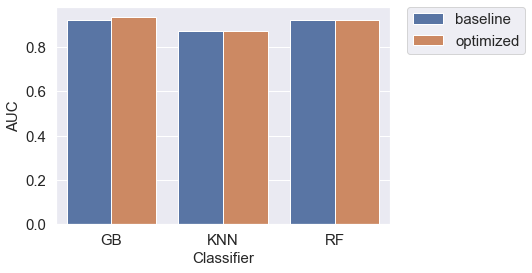

In [711]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

### Best Model

We choose optimized Gradient Boosting as the best model because it has the closest Training versus Validation scores and its AUC performance is about the same as the random forest.

In [722]:
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

### Model Evaluation

In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [724]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [725]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [726]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [727]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [728]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.983
accuracy:0.942
recall:0.885
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.921
accuracy:0.958
recall:0.889
precision:0.762
specificity:0.966
prevalence:0.108
 
Test:
AUC:0.861
accuracy:0.922
recall:0.753
precision:0.724
specificity:0.951
prevalence:0.146
 


In [729]:
df_perf = pd.DataFrame({'score':['AUC','AUC','AUC','Accuracy','Accuracy','Accuracy','Recall','Recall','Recall',
                                 'Precision','Precision','Precision','Specificity', 'Specificity', 'Specificity'],
                        'dataset':['Training','Validation','Test']*5,
                        'performance':[train_auc, valid_auc, test_auc,
                                       train_accuracy, valid_accuracy, test_accuracy,
                                       train_recall, valid_recall, test_recall,
                                       train_precision, valid_precision, test_precision,
                                       train_specificity, valid_specificity, test_specificity],        
                          })

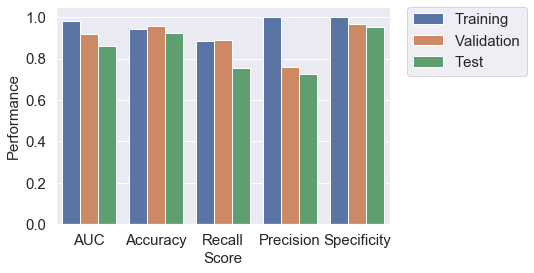

In [730]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="score", y="performance", hue="dataset", data=df_perf)
ax.set_xlabel('Score',fontsize = 15)
ax.set_ylabel('Performance', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

#### ROC Curve

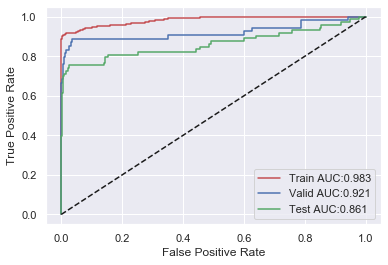

In [731]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Conclusion

In this project, we created new features by using total and average of customer calls, cost, and charges to predict will a customer churn. We trained eight models and evaluated the performance.

Based on the test dataset of the final optimized random forest model, 86 percent of our best model is able to differentiate between classes. Our model would catch 75 percent of the churn rate when we use a threshold of 0.5.

Based on the Lift ratio, we would perform 5 times better than randomly guessing. That means we are able to capture 5 times more customers compared to picking the same number of customers randomly.